In [1]:
import os
import tweepy as tw
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
consumer_key= 'qRbeWdEvZ0kZdQXfYET07e2Ep'
consumer_secret= 'hSjppkDMvnaqf0Tk8USRNtNWkCuEGAvxcGrAmo22TTp0yGh5ye'
access_token= '19154303-Hq0tF07yyHF96ozzpnaGyn7gxwoEYiLVtZDb9EfLJ'
access_token_secret= 'b6nQi5e8c58tJknAcMeuc5BdqNeOKcr8FyM95phxWx68C'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
tweets_df2=pd.read_csv("indigo1.csv")

In [4]:
tweets_df2.head()

,Unnamed: 0,Tweet_Text,created,Twitter_screenname,Followers,id,location
0,0,@IndiGo6E It's Mumbai .!!! ❤,2022-05-07 18:04:30+00:00,anandbalkrishna,19,1.523000e+18,India
1,1,@IndiGo6E @RGIAHyd please let me know of the p...,2022-05-07 18:04:01+00:00,pankaj95k,24,1.523000e+18,NaN
2,2,@IndiGo6E I've a flight from New Delhi to Chen...,2022-05-07 17:57:53+00:00,SarveshSauravt,36,1.523000e+18,NaN
3,3,@IndiGo6E Hey @IndiGo6E please help me with a ...,2022-05-07 17:54:38+00:00,Kiran_Surve,41,1.523000e+18,"Mumbai, India"
4,4,@IndiGo6E Thanks. Rescheduling the flight is s...,2022-05-07 17:53:33+00:00,akshatraj2606,25,1.523000e+18,"Pune, India"


In [5]:
import nltk
import re

In [6]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
#Adding custom stop words
new_words=[]
new_words = ["indigo","jm","hemendu","scindia","nan","airvistara","vistara","th","air","rt","airindiain","nmi","mkarthi","deepigoyal","gpwt","rt","zomato","zomatocare","some","one","like","time","br","movie","film","could","good",'even', 'get', 'would',
             'make', 'really', 'see', 'well', 'much', 'great', 'first', 'people', 'also', 'bad', 
             'show', 'way', 'thing', 'made', 'go', 'think', 'know', 'watch','look','many', 'covid', 'co','http', 'amp', 'vaccine', 'pandemic']
stop_words = stop_words.union(new_words)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'air',
 'airindiain',
 'airvistara',
 'all',
 'also',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'bad',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'co',
 'could',
 'couldn',
 "couldn't",
 'covid',
 'd',
 'deepigoyal',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'even',
 'few',
 'film',
 'first',
 'for',
 'from',
 'further',
 'get',
 'go',
 'good',
 'gpwt',
 'great',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'hemendu',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'if',
 'in',
 'indigo',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'jm',
 'just',
 'know',
 'like',
 'll',
 'look',
 'm',
 'ma',
 'made',
 'make

In [7]:
#Stemming words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
#Lemmatisation
from nltk.stem.wordnet import WordNetLemmatizer 
lm = WordNetLemmatizer() 

In [8]:
type(tweets_df2['Tweet_Text'][0])

str

In [9]:
corpus = []
for i in range(0, tweets_df2.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(tweets_df2['Tweet_Text'][i]))
    
    #Convert to lowercase
    text = text.lower()
    ##Convert to list from string
    text = text.split()
    ##Lemmatizing
    lm = WordNetLemmatizer() 
       
    
    text = [lm.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
#ignore words that appear in 80% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, ngram_range=(1,2), min_df=0.001)
X=cv.fit_transform(corpus)
vector = cv.transform(corpus)

In [12]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [13]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

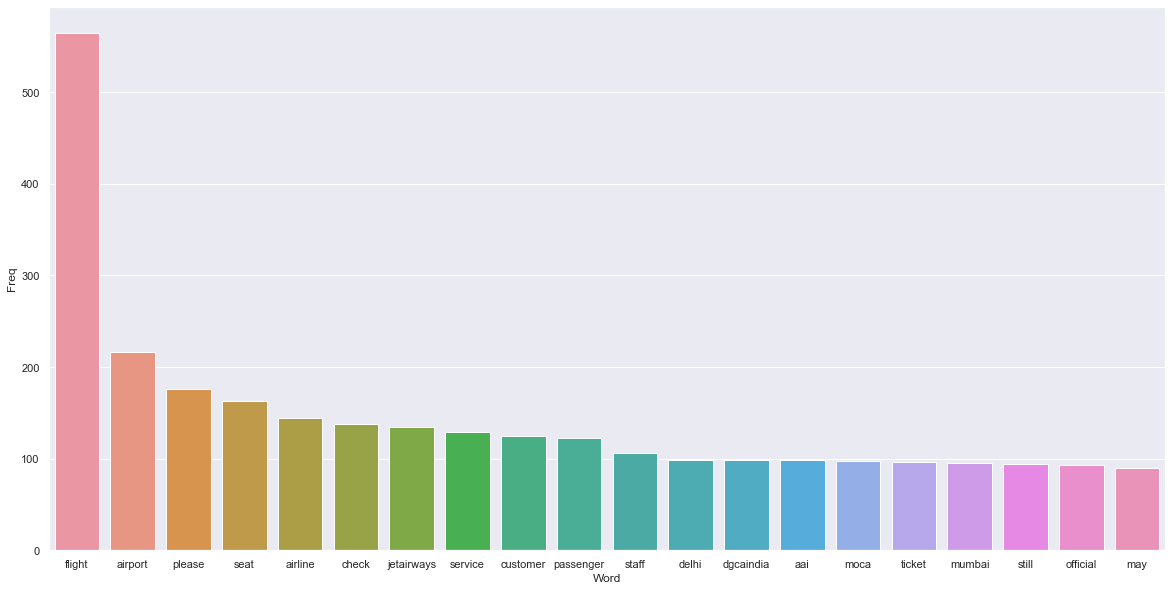

In [14]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Word", y="Freq",data=top_df)
plt.show()

In [15]:
#Visualise using word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from wordcloud import WordCloud

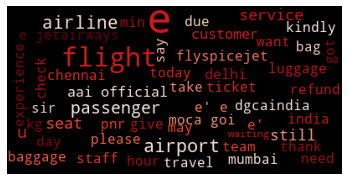

In [17]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
                          background_color='black',
                          colormap="Reds",
                          stopwords=stop_words,
                          max_words=50,
                          max_font_size=50, 
                          random_state=42,
                          ).generate(str(corpus))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [18]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=15)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

                        Bi-gram  Freq
0                  aai official    82
1                      moca goi    69
2                     web check    37
3                       arr dep    35
4                   please help    29
5                 customer care    26
6                  boarding pas    24
7                 direct flight    24
8                  ground staff    22
9                flight delayed    22
10                official moca    21
11            official aairhqsr    21
12  aaimysairport aaihbxairport    21
13               dgcaindia moca    20
14     virsanghvi tatacompanies    19


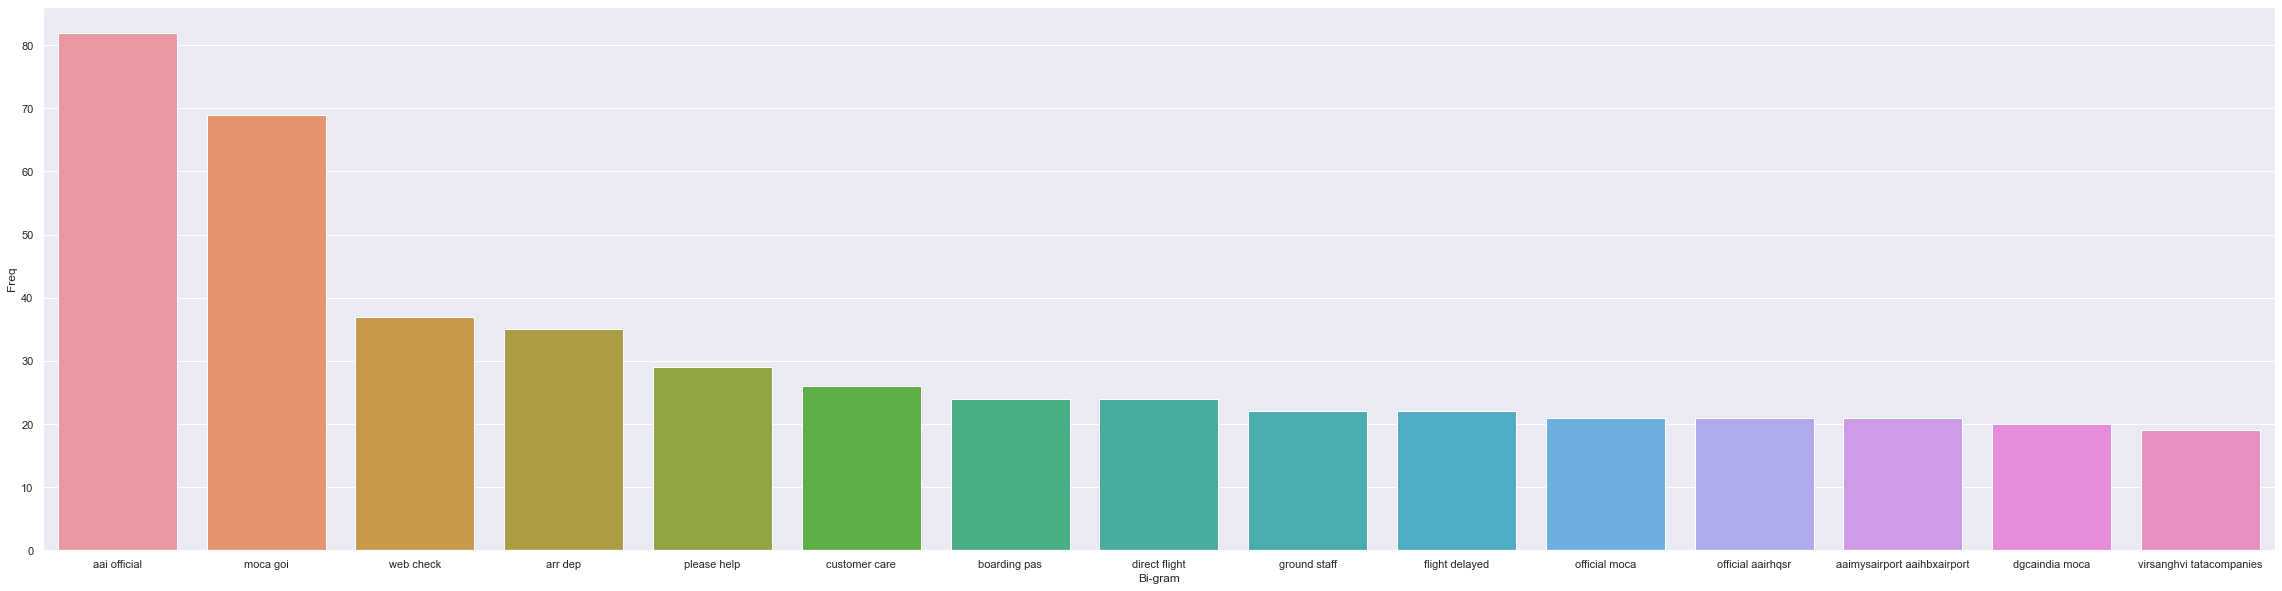

In [19]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x="Bi-gram", y="Freq",data=top2_df)
plt.show()

In [20]:
## Applying tf-idf vectoriser to the corpus
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the tf-idf model
tfv = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df = 0.00001)

In [21]:
# tokenize and build vocab
tfmat = tfv.fit_transform(corpus)
tfmat.shape

(1944, 22164)

In [22]:
feature_names=tfv.get_feature_names()

In [23]:
#Remove sparsity
dense = tfmat.todense()

In [24]:
#Convert the matrix to a list
corpus1 = dense[0].tolist()[0]

In [25]:
#Create a list of feature number and tf idf score - using pair iteration in list
phrase_scores = [pair for pair in zip(range(0, len(corpus1)), corpus1) if pair[1] > 0]

In [26]:
#Sort by second item in list - -1 for descending order
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:10]

[(12873, 1.0)]

In [27]:
#Get word instead of word id with score
phrase1=[]
scores=[]
for phrase, score in [(feature_names[word_id], score) 
                      for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))
   phrase1.append(phrase)
   scores.append(score)

mumbai               1.0


In [28]:
tweets_df3=pd.DataFrame({'Words':np.array(phrase1),'TFID_Scores':np.array(scores)})

In [29]:
tweets_df3

,Words,TFID_Scores
0,mumbai,1.0


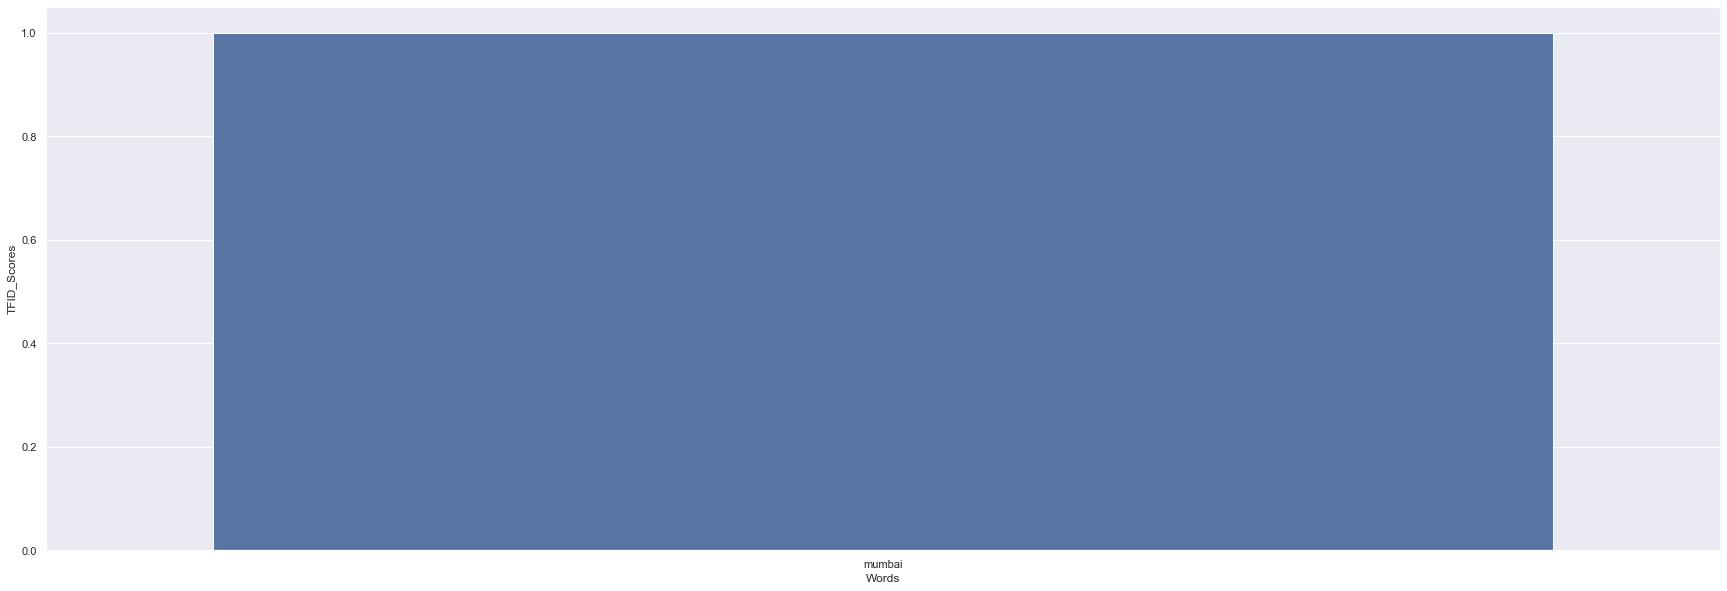

In [30]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x="Words", y="TFID_Scores",data=tweets_df3)
plt.show()